<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/Simulating_QERE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [2]:
!pip install visualkeras

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 997.4/997.4 kB 12.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_alpha
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.078_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.071_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.072_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.026_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.065_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.012_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.023_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.008_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.099_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.014_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.01_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.018_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.047_void_0

In [33]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


In [34]:
x_health , y_health , z_health = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_health_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()


  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])

In [35]:
x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß...
ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÅŸÑÿ™ ÿ¥ÿØŸá: Train (237, 48), Val (80, 48)
ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ VAE...
Epoch 1/50 - Recon Loss: 3.2671 - KL Loss: 0.1666
Epoch 11/50 - Recon Loss: 2.2815 - KL Loss: 0.0034
Epoch 21/50 - Recon Loss: 2.2519 - KL Loss: 0.0026
Epoch 31/50 - Recon Loss: 2.2504 - KL Loss: 0.0021
Epoch 41/50 - Recon Loss: 2.2499 - KL Loss: 0.0018
Epoch 50/50 - Recon Loss: 2.2496 - KL Loss: 0.0016
ÿØÿ± ÿ≠ÿßŸÑ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿÆÿ∑ÿß€å ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å...

ÿ≠ÿØ ⁄©ŸÜÿ™ÿ±ŸÑ ÿ®ÿßŸÑÿß€å€å (UCL) = 2.342435


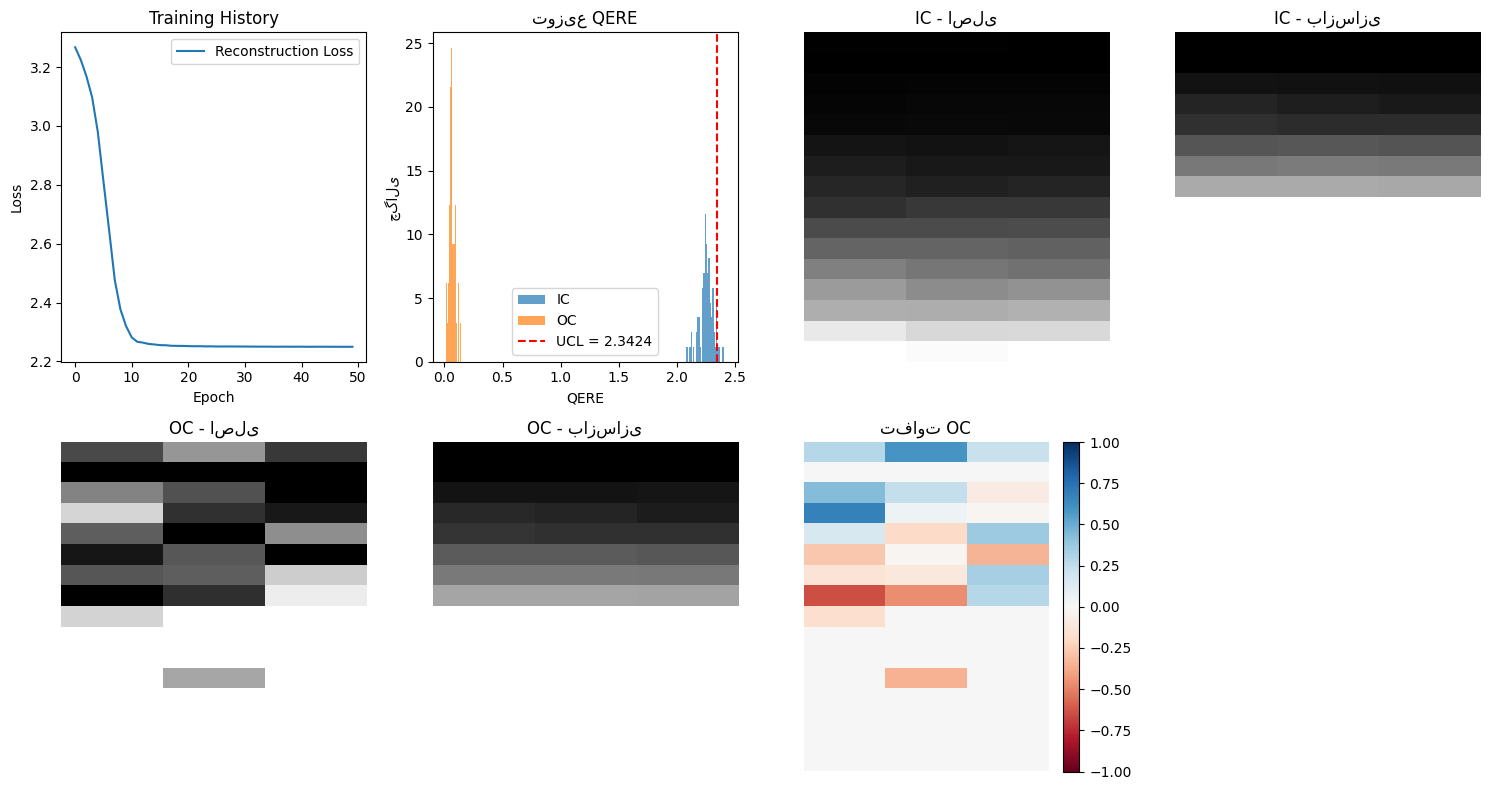


üìä ÿ¢ŸÖÿßÿ± ŸÜŸáÿß€å€å:
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ QERE (IC): 2.249925
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ QERE (OC): 0.068214
ŸÜÿ±ÿÆ ÿ™ÿ¥ÿÆ€åÿµ OC (Power): 0.000
ŸÜÿ±ÿÆ ÿ¢ŸÑÿßÿ±ŸÖ ⁄©ÿßÿ∞ÿ® (FAR): 0.038


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------------------
# 1. ÿ™ŸÜÿ∏€åŸÖÿßÿ™
# --------------------------------------------------------------------------------------------------
HEIGHT, WIDTH = 16, 3  # ÿØÿßÿØŸá‚ÄåŸáÿßÿ™: 16 ÿ±ÿØ€åŸÅÿå 3 ÿ≥ÿ™ŸàŸÜ
LATENT_DIM = 2
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 1e-3

print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß...")

# --------------------------------------------------------------------------------------------------
# 2. Ÿàÿ±ŸàÿØ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿ™Ÿà (ŸáŸÖ€åŸÜÿ¨Ÿàÿ±€å ⁄©Ÿá ÿØÿßÿ±€å)
# --------------------------------------------------------------------------------------------------
# ŸÅÿ±ÿ∂ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ z_health ŸÑ€åÿ≥ÿ™ €åÿß ÿ¢ÿ±ÿß€åŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å IC (ÿ≥ŸÑÿßŸÖÿ™) ÿ®ÿßÿ¥Ÿá
# ÿ™Ÿà ÿßŸÑÿßŸÜ ŸÅŸÇÿ∑ ÿß€åŸÜ ÿÆÿ∑ ÿ±Ÿà ÿπŸàÿ∂ ⁄©ŸÜ: z_health = ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿ™Ÿà

# ŸÖÿ´ÿßŸÑ:
# z_health = your_real_data_list  # shape: (N, 16, 3)

# ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá Ÿà ÿ±€å‚Äåÿßÿ¥€åŸæ (ŸáŸÖŸàŸÜÿ∑Ÿàÿ± ⁄©Ÿá ⁄ØŸÅÿ™€å)
# z_health = np.array(z_health)  # ÿß⁄Øÿ± ŸÑ€åÿ≥ÿ™ ÿ®ŸàÿØÿå ÿ®Ÿá numpy array ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äåÿ¥Ÿá
# z_health = z_health.reshape(-1, HEIGHT, WIDTH, 1)  # (N, 16, 3, 1)

# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá Train, Validation, Test (ŸáŸÖŸá IC)
from sklearn.model_selection import train_test_split

z_health_train, z_health_val = train_test_split(z_health, test_size=0.2, random_state=42)
z_health_train, z_health_test_ic = train_test_split(z_health_train, test_size=0.25, random_state=42)

# ÿ≥ÿßÿÆÿ™ ÿØÿßÿØŸá OC ŸÖÿµŸÜŸàÿπ€å (ÿ®ÿ±ÿß€å ÿ™ÿ≥ÿ™ ‚Äî ÿß⁄Øÿ± ÿØÿßÿØŸá OC ŸàÿßŸÇÿπ€å ÿØÿßÿ±€åÿå ÿ¨ÿß€å⁄Øÿ≤€åŸÜÿ¥ ⁄©ŸÜ)
z_health_test_oc = z_health_test_ic + np.random.normal(0, 0.5, z_health_test_ic.shape)
z_health_test_oc = np.clip(z_health_test_oc, 0, 1)  # ŸÖÿ≠ÿØŸàÿØ ⁄©ÿ±ÿØŸÜ ÿ®Ÿá [0,1]

# ŸÅŸÑÿ™ ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ¥ÿ®⁄©Ÿá Fully Connected
def flatten_data(x):
    return x.reshape(x.shape[0], -1)  # (N, 16, 3, 1) -> (N, 48)

X_train_flat = flatten_data(z_health_train)
X_val_flat = flatten_data(z_health_val)
X_test_ic_flat = flatten_data(z_health_test_ic)
X_test_oc_flat = flatten_data(z_health_test_oc)

print(f"ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÅŸÑÿ™ ÿ¥ÿØŸá: Train {X_train_flat.shape}, Val {X_val_flat.shape}")

# --------------------------------------------------------------------------------------------------
# 3. ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ VAE ÿ®ÿß ŸÑÿß€åŸá‚ÄåŸáÿß€å Dense (ÿ®ÿØŸàŸÜ ⁄©ÿßŸÜŸàŸÑŸàÿ¥ŸÜÿå ÿ®ÿØŸàŸÜ ÿÆÿ∑ÿß)
# --------------------------------------------------------------------------------------------------
# Encoder
encoder_inputs = keras.Input(shape=(HEIGHT * WIDTH,))  # 48
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(16, activation='relu')(latent_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(HEIGHT * WIDTH, activation='sigmoid')(x)  # 48
decoder = keras.Model(latent_inputs, x, name='decoder')

# --------------------------------------------------------------------------------------------------
# 4. ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ≥ÿ™€å ÿ®ÿß GradientTape (ÿ®ÿØŸàŸÜ fitÿå ÿ®ÿØŸàŸÜ compileÿå ÿ®ÿØŸàŸÜ ÿÆÿ∑ÿß)
# --------------------------------------------------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        z_mean, z_log_var, z = encoder(x)
        x_recon = decoder(z)
        recon_loss = tf.reduce_mean(tf.square(x - x_recon))
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = recon_loss + kl_loss
    grads = tape.gradient(total_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))
    return recon_loss, kl_loss, total_loss

# ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ
print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ VAE...")
recon_losses = []
kl_losses = []

for epoch in range(EPOCHS):
    epoch_recon = 0.0
    epoch_kl = 0.0
    num_batches = 0

    for i in range(0, len(X_train_flat), BATCH_SIZE):
        batch = X_train_flat[i:i+BATCH_SIZE]
        batch = tf.constant(batch, dtype=tf.float32)

        r_loss, k_loss, _ = train_step(batch)
        epoch_recon += r_loss
        epoch_kl += k_loss
        num_batches += 1

    epoch_recon /= num_batches
    epoch_kl /= num_batches
    recon_losses.append(epoch_recon)
    kl_losses.append(epoch_kl)

    if epoch % 10 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch {epoch+1}/{EPOCHS} - Recon Loss: {epoch_recon:.4f} - KL Loss: {epoch_kl:.4f}")

# --------------------------------------------------------------------------------------------------
# 5. ŸÖÿ≠ÿßÿ≥ÿ®Ÿá QERE Ÿà ÿ™ÿπ€å€åŸÜ UCL
# --------------------------------------------------------------------------------------------------
def calculate_qere(x_flat):
    x_flat = tf.constant(x_flat, dtype=tf.float32)
    z_mean, z_log_var, z = encoder(x_flat)
    x_recon_flat = decoder(z)
    qere = np.mean(np.square(x_flat.numpy() - x_recon_flat.numpy()), axis=1)
    return qere, x_recon_flat.numpy()

print("ÿØÿ± ÿ≠ÿßŸÑ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿÆÿ∑ÿß€å ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å...")
qere_ic, recon_ic_flat = calculate_qere(X_test_ic_flat)
qere_oc, recon_oc_flat = calculate_qere(X_test_oc_flat)

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá UCL ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å (Validation)
qere_val, _ = calculate_qere(X_val_flat)
UCL = np.percentile(qere_val, 95)  # 95th percentile
print(f"\nÿ≠ÿØ ⁄©ŸÜÿ™ÿ±ŸÑ ÿ®ÿßŸÑÿß€å€å (UCL) = {UCL:.6f}")

# ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å ÿØÿßÿØŸá ÿ®Ÿá ÿ¥⁄©ŸÑ ÿßŸàŸÑ€åŸá (16, 3, 1)
recon_ic = recon_ic_flat.reshape(-1, HEIGHT, WIDTH, 1)
recon_oc = recon_oc_flat.reshape(-1, HEIGHT, WIDTH, 1)

# --------------------------------------------------------------------------------------------------
# 6. ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
# --------------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 8))

# ŸÜŸÖŸàÿØÿßÿ± 1: ÿ™ÿßÿ±€åÿÆ⁄ÜŸá ÿ¢ŸÖŸàÿ≤ÿ¥
plt.subplot(2, 4, 1)
plt.plot(recon_losses, label='Reconstruction Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# ŸÜŸÖŸàÿØÿßÿ± 2: ÿ™Ÿàÿ≤€åÿπ QERE
plt.subplot(2, 4, 2)
plt.hist(qere_ic, bins=30, alpha=0.7, label='IC', density=True)
plt.hist(qere_oc, bins=30, alpha=0.7, label='OC', density=True)
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.title('ÿ™Ÿàÿ≤€åÿπ QERE')
plt.xlabel('QERE')
plt.ylabel('⁄Ü⁄ØÿßŸÑ€å')
plt.legend()

# ŸÜŸÖŸàÿØÿßÿ± 3 Ÿà 4: ŸÜŸÖŸàŸÜŸá IC
plt.subplot(2, 4, 3)
plt.imshow(z_health_test_ic[0, :, :, 0], cmap='gray', aspect='auto')
plt.title('IC - ÿßÿµŸÑ€å')
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(recon_ic[0, :, :, 0], cmap='gray', aspect='auto')
plt.title('IC - ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å')
plt.axis('off')

# ŸÜŸÖŸàÿØÿßÿ± 5 Ÿà 6: ŸÜŸÖŸàŸÜŸá OC
plt.subplot(2, 4, 5)
plt.imshow(z_health_test_oc[0, :, :, 0], cmap='gray', aspect='auto')
plt.title('OC - ÿßÿµŸÑ€å')
plt.axis('off')
plt.subplot(2, 4, 6)
plt.imshow(recon_oc[0, :, :, 0], cmap='gray', aspect='auto')
plt.title('OC - ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å')
plt.axis('off')

# ŸÜŸÖŸàÿØÿßÿ± 7: ÿ™ŸÅÿßŸàÿ™ OC
plt.subplot(2, 4, 7)
plt.imshow(z_health_test_oc[0, :, :, 0] - recon_oc[0, :, :, 0], cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
plt.title('ÿ™ŸÅÿßŸàÿ™ OC')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

# ⁄ÜÿßŸæ ÿ¢ŸÖÿßÿ±
print(f"\nüìä ÿ¢ŸÖÿßÿ± ŸÜŸáÿß€å€å:")
print(f"ŸÖ€åÿßŸÜ⁄Ø€åŸÜ QERE (IC): {np.mean(qere_ic):.6f}")
print(f"ŸÖ€åÿßŸÜ⁄Ø€åŸÜ QERE (OC): {np.mean(qere_oc):.6f}")
print(f"ŸÜÿ±ÿÆ ÿ™ÿ¥ÿÆ€åÿµ OC (Power): {np.mean(qere_oc > UCL):.3f}")
print(f"ŸÜÿ±ÿÆ ÿ¢ŸÑÿßÿ±ŸÖ ⁄©ÿßÿ∞ÿ® (FAR): {np.mean(qere_ic > UCL):.3f}")

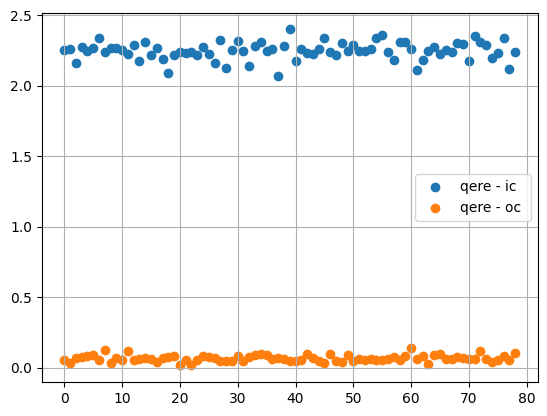

In [10]:
plt.scatter(range(len(qere_ic)) , qere_ic , label = "qere - ic ")
plt.scatter(range(len(qere_oc)) , qere_oc , label = "qere - oc ")
plt.legend()
plt.grid()
plt.show()

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --------------------------------------------------------------------------------------------------
# 1. ÿ™ŸÜÿ∏€åŸÖÿßÿ™
# --------------------------------------------------------------------------------------------------
HEIGHT, WIDTH = 16, 3  # ÿØÿßÿØŸá‚ÄåŸáÿßÿ™: 16 ÿ±ÿØ€åŸÅÿå 3 ÿ≥ÿ™ŸàŸÜ
LATENT_DIM = 2
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 1e-3

# --------------------------------------------------------------------------------------------------
# 2. ‚ö†Ô∏è ÿß€åŸÜÿ¨ÿß ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ÿ≥ÿßŸÑŸÖ (IC) ÿÆŸàÿØÿ™ ÿ±Ÿà Ÿàÿßÿ±ÿØ ⁄©ŸÜ
# --------------------------------------------------------------------------------------------------
# ŸÅÿ±ÿ∂ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ z_health_ic ŸÑ€åÿ≥ÿ™ €åÿß ÿ¢ÿ±ÿß€åŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑŸÖ ÿ®ÿßÿ¥Ÿá
# ÿ™Ÿà ŸÅŸÇÿ∑ ÿß€åŸÜ ÿÆÿ∑ ÿ±Ÿà ÿπŸàÿ∂ ⁄©ŸÜ:
# z_health_ic = your_real_ic_data  # shape: (N, 16, 3)

# ŸÖÿ´ÿßŸÑ (ÿß€åŸÜ ÿ±Ÿà ÿ®ÿß ÿØÿßÿØŸá ÿÆŸàÿØÿ™ ÿ¨ÿß€å⁄Øÿ≤€åŸÜ ⁄©ŸÜ):
# z_health_ic = np.array(your_ic_data_list)
# z_health_ic = np.array(z_health_ic)  # ÿß⁄Øÿ± ŸÑ€åÿ≥ÿ™ ÿ®ŸàÿØÿå ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äåÿ¥Ÿá
# z_health_ic = z_health_ic.reshape(-1, HEIGHT, WIDTH, 1)  # (N, 16, 3, 1)
z_health_ic = z_health
# ŸÅŸÑÿ™ ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá ÿ®ÿ±ÿß€å ÿ¥ÿ®⁄©Ÿá Fully Connected
X_train_flat = z_health_ic.reshape(z_health_ic.shape[0], -1)  # (N, 48)

# --------------------------------------------------------------------------------------------------
# 3. ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ VAE ÿ®ÿß ŸÑÿß€åŸá‚ÄåŸáÿß€å Dense (ÿ®ÿØŸàŸÜ ⁄©ÿßŸÜŸàŸÑŸàÿ¥ŸÜÿå ÿ®ÿØŸàŸÜ ÿÆÿ∑ÿß)
# --------------------------------------------------------------------------------------------------
# Encoder
encoder_inputs = keras.Input(shape=(HEIGHT * WIDTH,))  # 48
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(16, activation='relu')(latent_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(HEIGHT * WIDTH, activation='sigmoid')(x)  # 48
decoder = keras.Model(latent_inputs, x, name='decoder')

# --------------------------------------------------------------------------------------------------
# 4. ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ≥ÿ™€å ÿ®ÿß GradientTape (ÿ®ÿØŸàŸÜ fitÿå ÿ®ÿØŸàŸÜ compileÿå ÿ®ÿØŸàŸÜ ÿÆÿ∑ÿß)
# --------------------------------------------------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        z_mean, z_log_var, z = encoder(x)
        x_recon = decoder(z)
        recon_loss = tf.reduce_mean(tf.square(x - x_recon))
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = recon_loss + kl_loss
    grads = tape.gradient(total_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))
    return recon_loss, kl_loss

# ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ
print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ VAE...")
for epoch in range(EPOCHS):
    epoch_recon = 0.0
    epoch_kl = 0.0
    num_batches = 0

    for i in range(0, len(X_train_flat), BATCH_SIZE):
        batch = X_train_flat[i:i+BATCH_SIZE]
        batch = tf.constant(batch, dtype=tf.float32)

        r_loss, k_loss = train_step(batch)
        epoch_recon += r_loss
        epoch_kl += k_loss
        num_batches += 1

    epoch_recon /= num_batches
    epoch_kl /= num_batches

    if epoch % 10 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch {epoch+1}/{EPOCHS} - Recon Loss: {epoch_recon:.4f} - KL Loss: {epoch_kl:.4f}")

# --------------------------------------------------------------------------------------------------
# 5. ‚úÖ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ™ŸÖÿßŸÖ ÿ¥ÿØ ‚Äî ŸÖÿØŸÑ ÿ¢ŸÖÿßÿØŸá ÿßÿ≥ÿ™
# ÿ≠ÿßŸÑÿß ŸÖ€å‚Äåÿ™ŸàŸÜ€å QERE ÿ±Ÿà ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™ (IC €åÿß OC) ÿ≠ÿ≥ÿßÿ® ⁄©ŸÜ€å
# encoder Ÿà decoder ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØ€åÿØŸá‚ÄåÿßŸÜÿØ Ÿà ŸÖ€å‚Äåÿ™ŸàŸÜ€å ÿßÿ≤ÿ¥ŸàŸÜ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ŸÜ€å

ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ VAE...
Epoch 1/50 - Recon Loss: 3.2388 - KL Loss: 0.3205
Epoch 11/50 - Recon Loss: 2.2555 - KL Loss: 0.0001
Epoch 21/50 - Recon Loss: 2.2498 - KL Loss: 0.0000
Epoch 31/50 - Recon Loss: 2.2490 - KL Loss: 0.0000
Epoch 41/50 - Recon Loss: 2.2486 - KL Loss: 0.0000
Epoch 50/50 - Recon Loss: 2.2485 - KL Loss: 0.0000


In [36]:
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      total_alpha_x_y_z.append(img)
      label_alpha.append(i)


In [37]:
x_alpha , y_alpha , z_alpha = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_alpha_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_alpha.append(i['x'])
  y_alpha.append(i['y'])
  z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

In [19]:
# ŸÅÿ±ÿ∂ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿØÿßÿ±€å
# z_health_test_ic: ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑŸÖ ÿ™ÿ≥ÿ™
# z_health_test_oc: ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿπ€åÿ®‚ÄåÿØÿßÿ± ÿ™ÿ≥ÿ™

# z_health_test_ic = np.array(z_health).reshape(-1, 16, 3, 1)
# z_health_test_oc = np.array(z_alpha).reshape(-1, 16, 3, 1)

# ŸÅŸÑÿ™ ⁄©ÿ±ÿØŸÜ ÿ®ÿ±ÿß€å ÿ¥ÿ®⁄©Ÿá Dense
# X_test_ic_flat = z_health_test_ic.reshape(z_health.shape[0], -1)
# X_test_oc_flat = z_health_test_oc.reshape(z_alpha.shape[0], -1)

z_alpha = z_alpha.reshape(-1 , 48 )

In [20]:
z_alpha.shape

(396, 48)

In [22]:
z_health = z_health.reshape(-1 , 48 )

In [23]:
def calculate_qere(x_flat):
    x_flat = tf.constant(x_flat, dtype=tf.float32)
    z_mean, z_log_var, z = encoder(x_flat)
    x_recon_flat = decoder(z)
    qere = np.mean(np.square(x_flat.numpy() - x_recon_flat.numpy()), axis=1)
    return qere

# qere_ic = calculate_qere(z_alpha)
qere_ic2 = calculate_qere(z_health)

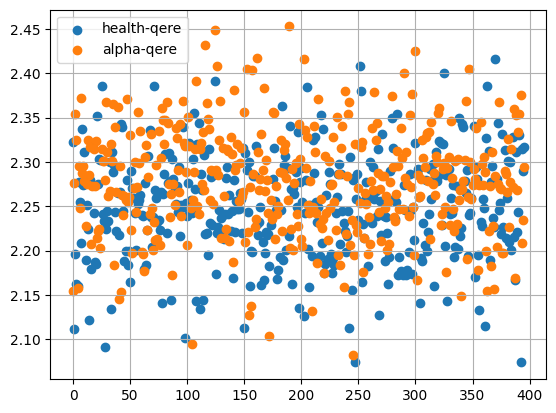

In [24]:
plt.scatter(range(len(qere_ic2)) , qere_ic2 , label = "health-qere")
plt.scatter(range(len(qere_ic)) , qere_ic , label = "alpha-qere")
plt.legend()
plt.grid()
plt.show()

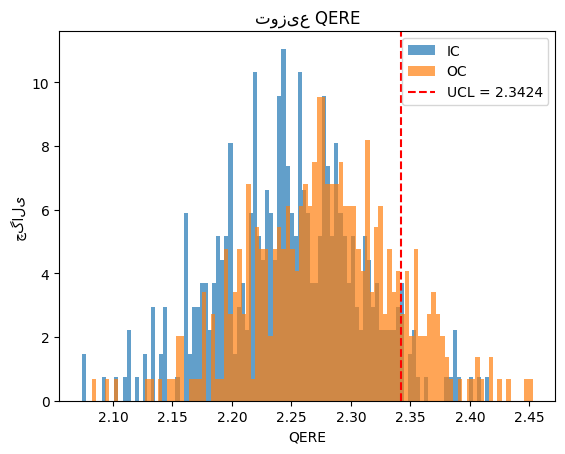

In [26]:
plt.hist(qere_ic2, bins=100, alpha=0.7, label='IC', density=True)
plt.hist(qere_ic, bins=100, alpha=0.7, label='OC', density=True)
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.title('ÿ™Ÿàÿ≤€åÿπ QERE')
plt.xlabel('QERE')
plt.ylabel('⁄Ü⁄ØÿßŸÑ€å')
plt.legend()
plt.show()

In [27]:
UCL = np.percentile(qere_ic2, 95)  # €åÿß 99 ÿ®ÿ±ÿß€å ÿ≠ÿ≥ÿßÿ≥€åÿ™ ÿ®€åÿ¥ÿ™ÿ±

In [28]:
UCL

np.float32(2.341386)

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------------------
# 1. ÿ™ŸÜÿ∏€åŸÖÿßÿ™
# --------------------------------------------------------------------------------------------------
HEIGHT, WIDTH = 16, 3
LATENT_DIM = 2
EPOCHS = 500
BATCH_SIZE = 10
LEARNING_RATE = 1e-4

print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß...")

# --------------------------------------------------------------------------------------------------
# 2. ‚ö†Ô∏è Ÿàÿ±ŸàÿØ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑŸÖ (IC) ÿÆŸàÿØÿ™
# --------------------------------------------------------------------------------------------------
# z_health_ic = ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑŸÖ ÿ™Ÿà (ŸÑ€åÿ≥ÿ™ €åÿß ÿ¢ÿ±ÿß€åŸá ÿßÿ≤ ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å 16x3)
# ŸÖÿ´ÿßŸÑ:
# z_health_ic = your_real_ic_data  # shape: (N, 16, 3)

# ŸÅÿ±ÿ∂ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿØÿßÿ±€å
# z_health_ic = np.array(z_health_ic)  # ÿß⁄Øÿ± ŸÑ€åÿ≥ÿ™ ÿ®ŸàÿØÿå ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äåÿ¥Ÿá
# z_health_ic = z_health_ic.reshape(-1, HEIGHT, WIDTH, 1)  # (N, 16, 3, 1)
z_health_ic = z_health
# ŸÅŸÑÿ™ ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá
X_train_flat = z_health_ic.reshape(z_health_ic.shape[0], -1)  # (N, 48)

# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá Train Ÿà Validation
from sklearn.model_selection import train_test_split
X_train_flat, X_val_flat = train_test_split(X_train_flat, test_size=0.2, random_state=42)

print(f"ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÅŸÑÿ™ ÿ¥ÿØŸá: Train {X_train_flat.shape}, Val {X_val_flat.shape}")

# --------------------------------------------------------------------------------------------------
# 3. ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ AAE ÿ®ÿß ŸÑÿß€åŸá‚ÄåŸáÿß€å Dense
# --------------------------------------------------------------------------------------------------
# Encoder
encoder_inputs = keras.Input(shape=(HEIGHT * WIDTH,))  # 48
x = layers.Dense(64, activation='relu',name='enc_dense1')(encoder_inputs)
x = layers.Dense(32, activation='relu',name='enc_dense2')(x)
x = layers.Dense(16, activation='relu',name='enc_dense3')(x)

z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(16, activation='relu',name='dec_dense1')(latent_inputs)
x = layers.Dense(32, activation='relu',name='dec_dense2')(x)
x = layers.Dense(64, activation='relu',name='dec_dense3')(x)
x = layers.Dense(HEIGHT * WIDTH, activation='sigmoid',name='dec_output')(x)  # 48
decoder = keras.Model(latent_inputs, x, name='decoder')

# Discriminator
discriminator_input = keras.Input(shape=(LATENT_DIM,))
d_x = layers.Dense(256, activation='relu', name='disc_dense1')(discriminator_input)
d_x = layers.Dense(128, activation='relu',name='disc_dense2')(d_x)
d_x = layers.Dense(1, activation='sigmoid',name='disc_output')(d_x)
discriminator = keras.Model(discriminator_input, d_x, name='discriminator')






# 3.1 ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ‚ÄåŸáÿß€å ŸÅÿ±ÿπ€å ÿ®ÿ±ÿß€å ÿØÿ≥ÿ™ÿ±ÿ≥€å ÿ®Ÿá ÿÆÿ±Ÿàÿ¨€å Ÿáÿ± ŸÑÿß€åŸá
# --------------------------------------------------------------------------------------------------
# ŸÑ€åÿ≥ÿ™ ÿ™ŸÖÿßŸÖ ŸÑÿß€åŸá‚ÄåŸáÿß€å€å ⁄©Ÿá ŸÖ€å‚Äåÿ™ŸàŸÜ€å ÿßÿ≤ÿ¥ŸàŸÜ ÿÆÿ±Ÿàÿ¨€å ÿ®⁄Ø€åÿ±€å
layer_outputs = {}
for layer in encoder.layers + decoder.layers + discriminator.layers:
    if hasattr(layer, 'output'):
        layer_outputs[layer.name] = layer.output

# # ÿ≥ÿßÿÆÿ™ €åŸá ŸÖÿØŸÑ ÿ®ÿ±ÿß€å Ÿáÿ± ŸÑÿß€åŸá (ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿÆÿ±Ÿàÿ¨€å)
feature_extractor = keras.Model(inputs=encoder_inputs, outputs=layer_outputs)

all_outputs = feature_extractor(X_train_flat)

# ÿ≠ÿßŸÑÿß ŸÖ€å‚Äåÿ™ŸàŸÜ€å ÿÆÿ±Ÿàÿ¨€å Ÿáÿ± ŸÑÿß€åŸá ÿ±Ÿà ÿ¨ÿØÿß⁄ØÿßŸÜŸá ÿ®ÿ®€åŸÜ€å
print("ŸÜÿßŸÖ ŸÑÿß€åŸá‚ÄåŸáÿß Ÿà ÿßÿ¥⁄©ÿßŸÑ ÿÆÿ±Ÿàÿ¨€å:")
for name, output in all_outputs.items():
    print(f"{name}: {output.shape}")


# --------------------------------------------------------------------------------------------------
# 4. ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ≥ÿ™€å ÿ®ÿß GradientTape
# --------------------------------------------------------------------------------------------------
optimizer_enc_dec = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
optimizer_disc = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape_enc_dec, tf.GradientTape() as tape_disc:
        # Forward pass
        z_mean, z_log_var, z = encoder(x)
        x_recon = decoder(z)

        # Discriminator loss
        real_labels = tf.ones((tf.shape(z)[0], 1))
        fake_labels = tf.zeros((tf.shape(z)[0], 1))
        d_real = discriminator(tf.random.normal((tf.shape(z)[0], LATENT_DIM)))
        d_fake = discriminator(z)
        d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, d_real)
        d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, d_fake)
        d_loss = tf.reduce_mean(d_loss_real) + tf.reduce_mean(d_loss_fake)

        # Generator (encoder/decoder) loss
        g_loss_recon = tf.reduce_mean(tf.square(x - x_recon))
        g_loss_adv = tf.reduce_mean(tf.keras.losses.binary_crossentropy(real_labels, d_fake))
        g_loss = g_loss_recon + g_loss_adv

    # ÿ¢ŸæÿØ€åÿ™ discriminator
    grads_disc = tape_disc.gradient(d_loss, discriminator.trainable_variables)
    optimizer_disc.apply_gradients(zip(grads_disc, discriminator.trainable_variables))

    # ÿ¢ŸæÿØ€åÿ™ encoder Ÿà decoder
    grads_enc_dec = tape_enc_dec.gradient(g_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer_enc_dec.apply_gradients(zip(grads_enc_dec, encoder.trainable_variables + decoder.trainable_variables))

    return g_loss_recon, g_loss_adv, d_loss

# --------------------------------------------------------------------------------------------------
# 5. ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ
# --------------------------------------------------------------------------------------------------
print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ AAE...")
for epoch in range(EPOCHS):
    epoch_recon = 0.0
    epoch_adv = 0.0
    epoch_disc = 0.0
    num_batches = 0

    for i in range(0, len(X_train_flat), BATCH_SIZE):
        batch = X_train_flat[i:i+BATCH_SIZE]
        batch = tf.constant(batch, dtype=tf.float32)

        r_loss, a_loss, d_loss = train_step(batch)
        epoch_recon += r_loss
        epoch_adv += a_loss
        epoch_disc += d_loss
        num_batches += 1

    epoch_recon /= num_batches
    epoch_adv /= num_batches
    epoch_disc /= num_batches

    if epoch % 10 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch {epoch+1}/{EPOCHS} - Recon Loss: {epoch_recon:.4f} - Adv Loss: {epoch_adv:.4f} - Disc Loss: {epoch_disc:.4f}")

# --------------------------------------------------------------------------------------------------
# 6. üîç ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ®ÿß QERE (ŸáŸÖÿßŸÜÿ∑Ÿàÿ± ⁄©Ÿá ŸÖŸÇÿßŸÑŸá ÿ™ÿ£⁄©€åÿØ ÿØÿßÿ±Ÿá)
# --------------------------------------------------------------------------------------------------
def calculate_qere(x_flat):
    x_flat = tf.constant(x_flat, dtype=tf.float32)
    z_mean, z_log_var, z = encoder(x_flat)
    x_recon_flat = decoder(z)
    qere = np.mean(np.square(x_flat.numpy() - x_recon_flat.numpy()), axis=1)
    return qere

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá QERE ÿ®ÿ±ÿß€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
qere_val = calculate_qere(X_val_flat)

# ÿ™ÿπ€å€åŸÜ UCL ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
UCL = np.percentile(qere_val, 95)
print(f"\nUCL = {UCL:.6f}")

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá FAR ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥
qere_train = calculate_qere(X_train_flat)
FAR = np.mean(qere_train > UCL)
print(f"ŸÜÿ±ÿÆ ÿ¢ŸÑÿßÿ±ŸÖ ⁄©ÿßÿ∞ÿ® (FAR): {FAR:.3f}")

# ŸÜŸÖÿß€åÿ¥ ÿ™Ÿàÿ≤€åÿπ QERE
plt.figure(figsize=(10, 6))
plt.hist(qere_val, bins=80, alpha=0.7, label='Validation (IC)', density=True)
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.title('Distribution of QERE')
plt.xlabel('QERE')
plt.ylabel('Density')
plt.legend()
plt.show()

ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß...
ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÅŸÑÿ™ ÿ¥ÿØŸá: Train (316, 48), Val (80, 48)


KeyError: "Exception encountered when calling Functional.call().\n\n\x1b[1m135994712754000\x1b[0m\n\nArguments received by Functional.call():\n  ‚Ä¢ inputs=array([[0.0158408 , 0.0125848 , 0.01096868, ..., 4.79053574, 4.87637576,\n        4.81682474],\n       [0.01485527, 0.00778612, 0.0173597 , ..., 4.91522289, 4.68117295,\n        4.75731224],\n       [0.01575289, 0.02063662, 0.02136374, ..., 5.10879119, 4.83204374,\n        4.7870945 ],\n       ...,\n       [0.02494821, 0.01661856, 0.01486064, ..., 5.04753668, 4.63183295,\n        4.87122676],\n       [0.02035429, 0.0145818 , 0.01362014, ..., 5.0244227 , 4.86236685,\n        4.87068865],\n       [0.01373453, 0.0130743 , 0.01162029, ..., 4.91538132, 5.02794141,\n        5.01365468]])\n  ‚Ä¢ training=None\n  ‚Ä¢ mask=None\n  ‚Ä¢ kwargs=<class 'inspect._empty'>"

In [41]:
z_health.shape

(396, 16, 3, 1)

In [55]:
# z_health_oc = np.array(your_oc_data).reshape(-1, 16, 3, 1)
z_health_oc = z_alpha
X_oc_flat = z_health_oc.reshape(z_health_oc.shape[0], -1)
qere_oc = calculate_qere(X_oc_flat)
power = np.mean(qere_oc > UCL)
print(f"ŸÜÿ±ÿÆ ÿ™ÿ¥ÿÆ€åÿµ OC (Power): {power:.3f}")

ŸÜÿ±ÿÆ ÿ™ÿ¥ÿÆ€åÿµ OC (Power): 0.051


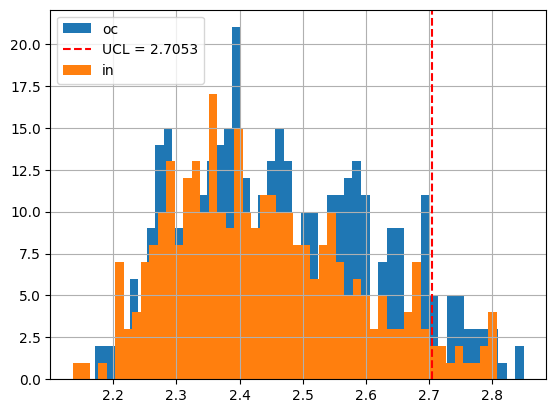

In [50]:
plt.hist(qere_oc , bins = 50 , label="oc")
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.hist(qere_train , bins = 50 , label="in")
plt.legend()
plt.grid()
plt.show()

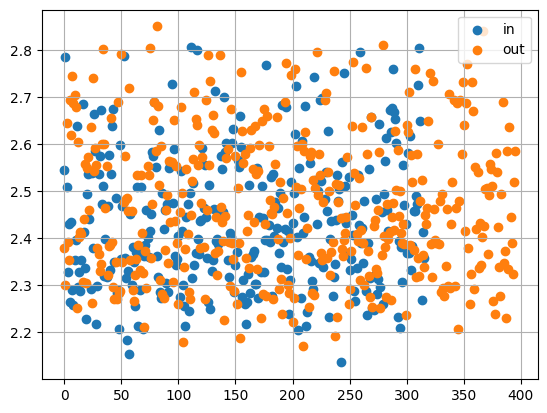

In [52]:
# plt.scatter(range(len(qere_oc)) , qere_oc )
plt.scatter(range(len(qere_train)) , qere_train  , label="in")
plt.scatter(range(len(qere_oc)) , qere_oc , label="out")
plt.legend()
plt.grid()
plt.show()

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------------------
# 1. ÿ™ŸÜÿ∏€åŸÖÿßÿ™
# --------------------------------------------------------------------------------------------------
HEIGHT, WIDTH = 16, 3
LATENT_DIM = 2
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 1e-4

print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß...")

# --------------------------------------------------------------------------------------------------
# 2. ‚ö†Ô∏è Ÿàÿ±ŸàÿØ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑŸÖ (IC) ÿÆŸàÿØÿ™
# --------------------------------------------------------------------------------------------------
# z_health_ic = ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑŸÖ ÿ™Ÿà (ŸÑ€åÿ≥ÿ™ €åÿß ÿ¢ÿ±ÿß€åŸá ÿßÿ≤ ŸÖÿßÿ™ÿ±€åÿ≥‚ÄåŸáÿß€å 16x3)
# ŸÖÿ´ÿßŸÑ:
# z_health_ic = your_real_ic_data  # shape: (N, 16, 3)

# ŸÅÿ±ÿ∂ ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿØÿßÿ±€å
# z_health_ic = np.array(z_health_ic)  # ÿß⁄Øÿ± ŸÑ€åÿ≥ÿ™ ÿ®ŸàÿØÿå ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá ÿ™ÿ®ÿØ€åŸÑ ŸÖ€å‚Äåÿ¥Ÿá
# z_health_ic = z_health_ic.reshape(-1, HEIGHT, WIDTH, 1)  # (N, 16, 3, 1)
z_health_ic = z_health
# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß
from sklearn.model_selection import train_test_split
z_health_train, z_health_val = train_test_split(z_health_ic, test_size=0.25, random_state=42)

print(f"ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß: Train {z_health_train.shape}, Val {z_health_val.shape}")

# --------------------------------------------------------------------------------------------------
# 3. ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ AAE ÿ®ÿß ŸÑÿß€åŸá‚ÄåŸáÿß€å Dense
# --------------------------------------------------------------------------------------------------
# Encoder
encoder_inputs = keras.Input(shape=(HEIGHT * WIDTH,))  # 48
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(16, activation='relu')(latent_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(HEIGHT * WIDTH, activation='sigmoid')(x)  # 48
decoder = keras.Model(latent_inputs, x, name='decoder')

# Discriminator
discriminator_input = keras.Input(shape=(LATENT_DIM,))
d_x = layers.Dense(256, activation='relu')(discriminator_input)
d_x = layers.Dense(128, activation='relu')(d_x)
d_x = layers.Dense(1, activation='sigmoid')(d_x)
discriminator = keras.Model(discriminator_input, d_x, name='discriminator')

# --------------------------------------------------------------------------------------------------
# 4. ÿ¢ŸÖŸàÿ≤ÿ¥ ÿØÿ≥ÿ™€å ÿ®ÿß GradientTape
# --------------------------------------------------------------------------------------------------
optimizer_enc_dec = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
optimizer_disc = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape_enc_dec, tf.GradientTape() as tape_disc:
        # Forward pass
        z_mean, z_log_var, z = encoder(x)
        x_recon = decoder(z)

        # Discriminator loss
        real_labels = tf.ones((tf.shape(z)[0], 1))
        fake_labels = tf.zeros((tf.shape(z)[0], 1))
        d_real = discriminator(tf.random.normal((tf.shape(z)[0], LATENT_DIM)))
        d_fake = discriminator(z)
        d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, d_real)
        d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, d_fake)
        d_loss = tf.reduce_mean(d_loss_real) + tf.reduce_mean(d_loss_fake)

        # Generator (encoder/decoder) loss
        g_loss_recon = tf.reduce_mean(tf.square(x - x_recon))
        g_loss_adv = tf.reduce_mean(tf.keras.losses.binary_crossentropy(real_labels, d_fake))
        g_loss = g_loss_recon + g_loss_adv

    # ÿ¢ŸæÿØ€åÿ™ discriminator
    grads_disc = tape_disc.gradient(d_loss, discriminator.trainable_variables)
    optimizer_disc.apply_gradients(zip(grads_disc, discriminator.trainable_variables))

    # ÿ¢ŸæÿØ€åÿ™ encoder Ÿà decoder
    grads_enc_dec = tape_enc_dec.gradient(g_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer_enc_dec.apply_gradients(zip(grads_enc_dec, encoder.trainable_variables + decoder.trainable_variables))

    return g_loss_recon, g_loss_adv, d_loss

# --------------------------------------------------------------------------------------------------
# 5. ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ
# --------------------------------------------------------------------------------------------------
print("ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ AAE...")
for epoch in range(EPOCHS):
    epoch_recon = 0.0
    epoch_adv = 0.0
    epoch_disc = 0.0
    num_batches = 0

    for i in range(0, len(z_health_train), BATCH_SIZE):
        batch = z_health_train[i:i+BATCH_SIZE]
        batch = tf.constant(batch, dtype=tf.float32)

        r_loss, a_loss, d_loss = train_step(batch)
        epoch_recon += r_loss
        epoch_adv += a_loss
        epoch_disc += d_loss
        num_batches += 1

    epoch_recon /= num_batches
    epoch_adv /= num_batches
    epoch_disc /= num_batches

    if epoch % 10 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch {epoch+1}/{EPOCHS} - Recon Loss: {epoch_recon:.4f} - Adv Loss: {epoch_adv:.4f} - Disc Loss: {epoch_disc:.4f}")

# --------------------------------------------------------------------------------------------------
# 6. üîç ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ®ÿß QERE Ÿà ÿØÿ≥ÿ™ÿ±ÿ≥€å ÿ®Ÿá ŸÑÿß€åŸá ŸæŸÜŸáÿßŸÜ
# --------------------------------------------------------------------------------------------------
def calculate_qere_and_latent(x):
    x_flat = tf.constant(x.reshape(x.shape[0], -1), dtype=tf.float32)
    z_mean, z_log_var, z = encoder(x_flat)
    x_recon_flat = decoder(z)
    qere = np.mean(np.square(x_flat.numpy() - x_recon_flat.numpy()), axis=1)
    return qere, z_mean.numpy(), z_log_var.numpy()

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá QERE Ÿà ÿ≤€åÿ±ŸÖÿ¨ŸÖŸàÿπŸá‚ÄåŸáÿß€å ŸÑÿß€åŸá ŸæŸÜŸáÿßŸÜ ÿ®ÿ±ÿß€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
qere_val, z_mean_val, z_log_var_val = calculate_qere_and_latent(z_health_val)

# ÿ™ÿπ€å€åŸÜ UCL ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
UCL = np.percentile(qere_val, 95)
print(f"\nUCL = {UCL:.6f}")

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá FAR ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥
qere_train, _, _ = calculate_qere_and_latent(z_health_train)
FAR = np.mean(qere_train > UCL)
print(f"ŸÜÿ±ÿÆ ÿ¢ŸÑÿßÿ±ŸÖ ⁄©ÿßÿ∞ÿ® (FAR): {FAR:.3f}")

# --------------------------------------------------------------------------------------------------
# 7. üñºÔ∏è ŸÜŸÖÿß€åÿ¥ ÿ™ÿµŸà€åÿ± ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å ÿ¥ÿØŸá Ÿà ŸÑÿß€åŸá ŸæŸÜŸáÿßŸÜ
# --------------------------------------------------------------------------------------------------
# ÿßŸÜÿ™ÿÆÿßÿ® €åŸá ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±ÿ≥ŸÜÿ¨€å
sample_idx = 0
sample_original = z_health_val[sample_idx]  # (16, 3, 1)
sample_flat = sample_original.reshape(1, -1)  # (1, 48)

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá QERE Ÿà ŸÑÿß€åŸá ŸæŸÜŸáÿßŸÜ
qere_sample, z_mean_sample, z_log_var_sample = calculate_qere_and_latent(sample_flat)

# ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å ÿ™ÿµŸà€åÿ±
x_recon_flat = decoder(encoder(sample_flat)[2])  # z -> x_recon
x_recon = x_recon_flat.numpy().reshape(HEIGHT, WIDTH, 1)

# ŸÜŸÖÿß€åÿ¥ ÿ™ÿµŸà€åÿ± ÿßÿµŸÑ€å Ÿà ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å ÿ¥ÿØŸá
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample_original[:, :, 0], cmap='gray', aspect='auto')
plt.title('ÿ™ÿµŸà€åÿ± ÿßÿµŸÑ€å (ÿ≥ÿßŸÑŸÖ)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_recon[:, :, 0], cmap='gray', aspect='auto')
plt.title('ÿ™ÿµŸà€åÿ± ÿ®ÿßÿ≤ÿ≥ÿßÿ≤€å ÿ¥ÿØŸá')
plt.axis('off')

plt.tight_layout()
plt.show()

# ŸÜŸÖÿß€åÿ¥ ŸÑÿß€åŸá ŸæŸÜŸáÿßŸÜ
print(f"\nz_mean: {z_mean_sample}")
print(f"z_log_var: {z_log_var_sample}")

# ŸÜŸÖÿß€åÿ¥ ÿ™Ÿàÿ≤€åÿπ QERE
plt.figure(figsize=(10, 6))
plt.hist(qere_val, bins=30, alpha=0.7, label='Validation (IC)', density=True)
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.title('ÿ™Ÿàÿ≤€åÿπ QERE')
plt.xlabel('QERE')
plt.ylabel('⁄Ü⁄ØÿßŸÑ€å')
plt.legend()
plt.show()

ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß...
ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß: Train (297, 16, 3, 1), Val (99, 16, 3, 1)
ÿØÿ± ÿ≠ÿßŸÑ ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ AAE...


ValueError: in user code:

    File "/tmp/ipython-input-2575578787.py", line 80, in train_step  *
        z_mean, z_log_var, z = encoder(x)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/input_spec.py", line 245, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "encoder" is incompatible with the layer: expected shape=(None, 48), found shape=(32, 16, 3)
